# Logistic Regression for Binary Classification

## Objective
The goal of this notebook is to introduce logistic regression as a method for binary classification.


## Key Concepts
- **Odds Ratio:** How much more likely an event is to occur than not.
- **Log-Odds:** The logarithm of the odds ratio.
- **Sigmoid Function:** The function used to map predicted values to probabilities.
- **Likelihood:** The probability of the observed data given a model.
- **Model Fitting:** The process of adjusting the model parameters to minimize the difference between predicted and observed values.
- **Evaluation Metrics:** Methods for assessing the performance of the model, including accuracy, precision, recall, and the ROC curve.


## Practical Example: Spam Email Classification

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline

In [20]:
# Load the spam dataset
# Assuming the path 'spam.csv' is correct and the file is in the expected format
spam_data = pd.read_csv('./datasets/spam.csv', usecols=['v1', 'v2'], encoding='latin-1')  # Only load the 'Type' and 'Message' columns
spam_data.columns = ['label', 'message']  # Rename columns for clarity


In [21]:
spam_data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
# Convert labels to a binary format
spam_data['label'] = spam_data['label'].map({'ham': 0, 'spam': 1})


In [23]:
# Feature matrix and target vector
X = spam_data['message']
y = spam_data['label']

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [25]:
# Create a text processing and classification pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),  # Convert messages to TF-IDF features
    ('logreg', LogisticRegression())  # Apply logistic regression
])

In [26]:
# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('logreg', LogisticRegression())])

In [27]:
# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

In [28]:
# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1])


In [29]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.9659090909090909
Precision: 0.9939024390243902
Recall: 0.7442922374429224
ROC AUC: 0.98473006564909


The results displayed are from the evaluation of a logistic regression model used for classifying messages as spam or not spam. Here’s what the reported metrics mean:

* Accuracy (0.9659 or 96.59%) indicates the proportion of total predictions (spam and non-spam) that were correct. It shows that the model correctly identified about 96.59% of the messages.
* Precision (0.9939 or 99.39%) reflects the proportion of messages classified as spam that were actually spam. This high precision indicates that when the model predicts a message is spam, it is correct 99.39% of the time.
* Recall (0.7449 or 74.49%) indicates the proportion of actual spam messages that were correctly identified by the model. A recall of 74.49% means the model detected approximately 74.49% of all actual spam messages.
* ROC AUC (0.9847 or 98.47%) is the area under the receiver operating characteristic curve. It measures the model's ability to discriminate between the positive (spam) and negative (non-spam) classes. An AUC close to 1 indicates that the model is very good at separating the spam messages from the non-spam ones. Here, the value suggests the model does an excellent job.

In [30]:
# Output the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1452    1]
 [  56  163]]


The first row represents messages that are actually non-spam:
* 1452 true negatives (TN): The model correctly identified 1452 messages as non-spam.
* 1 false positive (FP): The model incorrectly identified 1 message as spam when it was not.

The second row represents messages that are actually spam:
* 56 false negatives (FN): The model incorrectly identified 56 messages as non-spam when they were spam.
* 163 true positives (TP): The model correctly identified 163 messages as spam.

The model's high accuracy and precision are very good signs, but the recall indicates there's room for improvement in catching spam messages (as it missed about 25.51% of them). The ROC AUC score is excellent, suggesting that the model has a high degree of separability and can distinguish well between the classes. However, the context of use should dictate the importance of these metrics. For spam filters, a high precision might be more desirable to minimize the annoyance of legitimate emails being classified as spam.

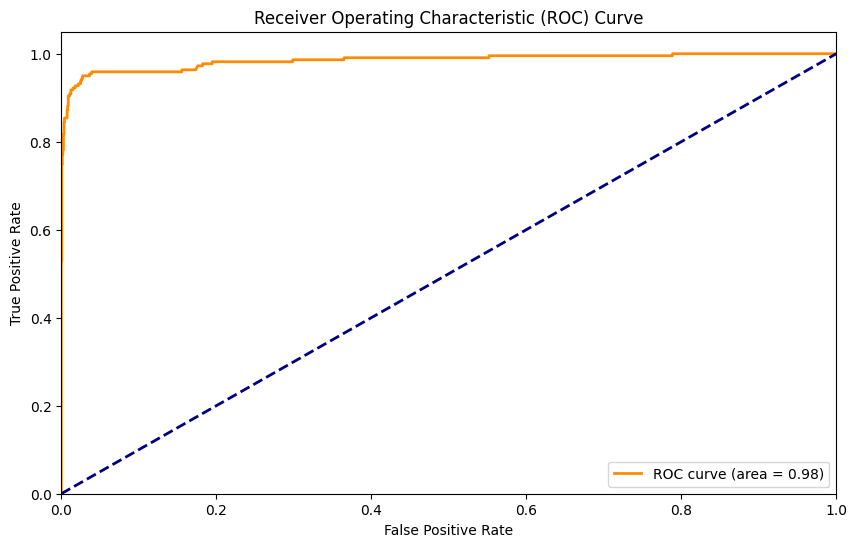

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, pipeline.predict_proba(X_test)[:,1])

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The ROC curve is a graphical representation of the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds. The AUC score tells us how well the model distinguishes between classes. Higher AUC scores indicate a better performing model.